In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
gw_df = pd.read_csv('../data/richers_1764.csv')

sampling_period = 0.00024354078

### Analysis

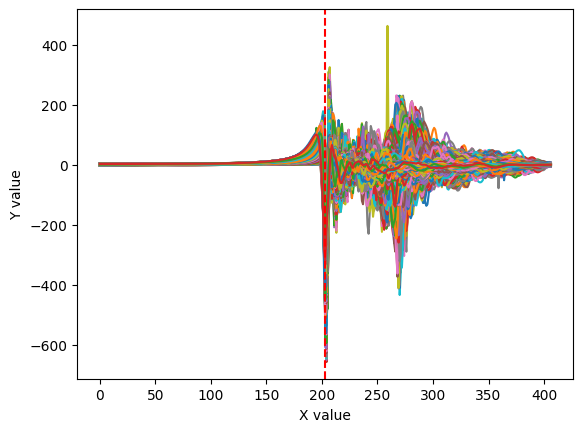

In [12]:
gw_df.plot(legend=False)

plt.xlabel('n (???)')
plt.ylabel('Strain (???)')

# the core bounce is at n = 203
plt.axvline(x=203, color='r', linestyle='--')  # red, dashed line

plt.show()

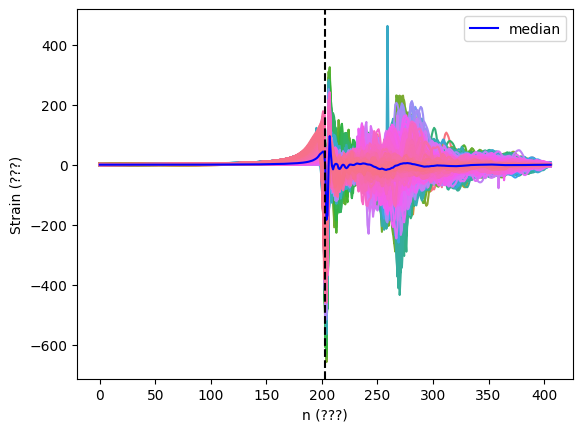

In [30]:
# convert the DataFrame from wide format to long format for seaborn
gw_df_long = pd.melt(gw_df.reset_index(), id_vars='index')

gw_df_long.columns = ['n (???)', 'Line', 'Strain (???)']

# confidence intervals
sns.lineplot(x='n (???)', y='Strain (???)', hue='Line', data=gw_df_long, errorbar=('ci', 95), n_boot=1000, legend=False)

median_line = gw_df.median(axis=1)
plt.plot(median_line.index, median_line.values, 'b-', label='median')

# the core bounce is at n = 203
plt.axvline(x=203, color='black', linestyle='--')  

plt.legend()
plt.show()